Enter Keyword/Tag to search about: bts
Enter how many tweets to search: 200
How people are reacting on bts by analyzing 200tweets.

General Report: 
Positive

Detailed Report: 
33.50% people thought it was positive
12.50% people thought it was negative
54.00% people thought it was neutral
Polarity is 0.07840338203463204


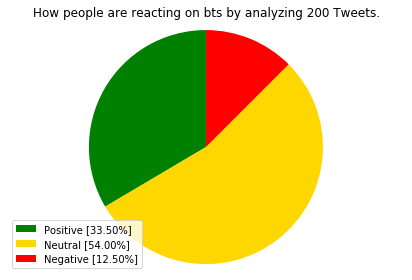

In [1]:
import sys,tweepy,csv,re 
from textblob import TextBlob 
import matplotlib.pyplot as plt  
class SentimentAnalysis:  
    def __init__(self): 
        self.tweets = [] 
        self.tweetText = []  
    def DownloadData(self):  
        consumerKey = CONSUMER_KEY
        consumerSecret = CONSUMER_SECRET_KEY
        accessToken = ACCESS_TOKEN
        accessTokenSecret = ACCESS_TOKEN_SECRET 
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret) 
        auth.set_access_token(accessToken, accessTokenSecret) 
        api = tweepy.API(auth) 
      
        searchTerm = input("Enter Keyword/Tag to search about: ") 
        NoOfTerms = int(input("Enter how many tweets to search: ")) 
        
        self.tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms) 
        
        csvFile = open('result.csv', 'a') 
        csvWriter = csv.writer(csvFile) 
        
        polarity = 0 
        positive = 0 
        negative = 0 
        neutral = 0   
        for tweet in self.tweets: 
            self.tweetText.append(self.cleanTweet(tweet.text).encode('utf-8')) 
            analysis = TextBlob(tweet.text) 
            polarity += analysis.sentiment.polarity    
            if (analysis.sentiment.polarity == 0):   
                neutral += 1 
            elif (analysis.sentiment.polarity > 0): 
                positive += 1 
            elif (analysis.sentiment.polarity < 0): 
                negative += 1 
    
        csvWriter.writerow(self.tweetText) 
        csvFile.close()  
        positive = self.percentage(positive, NoOfTerms) 
        negative = self.percentage(negative, NoOfTerms) 
        neutral = self.percentage(neutral, NoOfTerms) 
       
        polarity = polarity / NoOfTerms 
        print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + "tweets.") 
        print() 
        print("General Report: ")  
        if (polarity == 0): 
            print("Neutral") 
        elif (polarity > 0.00): 
            print("Positive") 
        elif (polarity < 0.00): 
            print("Negative")  
        print() 
        print("Detailed Report: ") 
        print(str(positive) + "% people thought it was positive") 
        print(str(negative) + "% people thought it was negative") 
        print(str(neutral) + "% people thought it was neutral") 
        print("Polarity is " + str(polarity))  
        self.PlotChart(positive, negative, neutral, searchTerm, NoOfTerms)  
    def cleanTweet(self, tweet): 
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())  
    def percentage(self, part, whole): 
        temp = 100 * float(part) / float(whole) 
        return format(temp, '.2f')  
              
    def PlotChart(self, positive, negative, neutral, searchTerm, noOfSearchTerms): 
        labels = ['Positive [' + str(positive) + '%]', 'Neutral [' + str(neutral) + '%]','Negative [' + str(negative) + '%]'] 
        sizes = [positive, neutral, negative] 
        colors = ['green', 'gold', 'red'] 
        patches, texts = plt.pie(sizes, colors=colors, startangle=90) 
        plt.legend(patches, labels, loc="best") 
        plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.') 
        plt.axis('equal') 
        plt.tight_layout() 
        plt.show()  
if __name__== "__main__": 
    sa = SentimentAnalysis() 
    sa.DownloadData() 